In [1]:
from scipy.io import wavfile
import matplotlib.pyplot as plt
import numpy as np
import os
from scipy.signal import butter, lfilter
from noisereduce import reduce_noise

data_path = "data/01/chicken-zuchini-experiments_07-10_March_2025"

/home/rynowak/Dokumenty/Programy/medyczna/Vibroacoustic-analysis/env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [8]:
from segments import segmentations

segments_speed_mapping = {
    "speed_10": "slow",
    "speed_15": "medium",
    "speed_25": "fast",
}

segments_type_mapping = {
    "ChickenBottom_ZuchiniTop": "zucchini_top",
    "ChickenTop_ZuchiniBottom": "zucchini_bottom",
}

materials_color_mapping = {
    "air": "green",
    "gelatine": "yellow",
    "zucchini": "purple",
    "chicken": "red",
}

def plot_audio(data, sr):
    times = np.arange(len(data)) / sr 
    plt.plot(times, data)
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')


def plot_examples(wav_dir, type, speed):
    wav_paths = os.listdir(wav_dir)
    wav_paths = [wav for wav in wav_paths if wav.endswith('processed.wav')][:9]
    plt.figure(figsize=(16, 12))
    plt.suptitle(f"Spectrograms of {type} ({speed}) examples")
    plt.rcParams.update({'font.size': 8})
    for i, wav_file in enumerate(wav_paths):
        sr, audio = wavfile.read(os.path.join(wav_dir, wav_file))
        plt.subplot(3, 3, i + 1)
        audio = audio / np.max(np.abs(audio))
        plot_audio(audio[:, 0].clip(-0.2, 0.2), sr)
        
        # b, a = butter(7, [3000, 6000], btype="bandpass", fs=sr)
        # audio_filtered = lfilter(b, a, audio[:, 0])
        # plot_audio(audio_filtered.clip(-0.2, 0.2), sr)

        reduced_audio = reduce_noise(y=audio[:, 0], sr=sr, prop_decrease=0.75)
        plot_audio(reduced_audio.clip(-0.2, 0.2), sr)

        plt.title(f"{wav_file}")
        for segment in segmentations[segments_speed_mapping[speed]][segments_type_mapping[type]]:
            start, end = segment.segments[0]
            plt.axvline(x=start, color='r', linestyle='--', linewidth=0.8)
            plt.axvspan(start, end, color=materials_color_mapping[segment.material_name], alpha=0.25, label=segment.material_name)
            plt.axvline(x=end, color='r', linestyle='--', linewidth=0.8)
        
        plt.legend()

    plt.show()


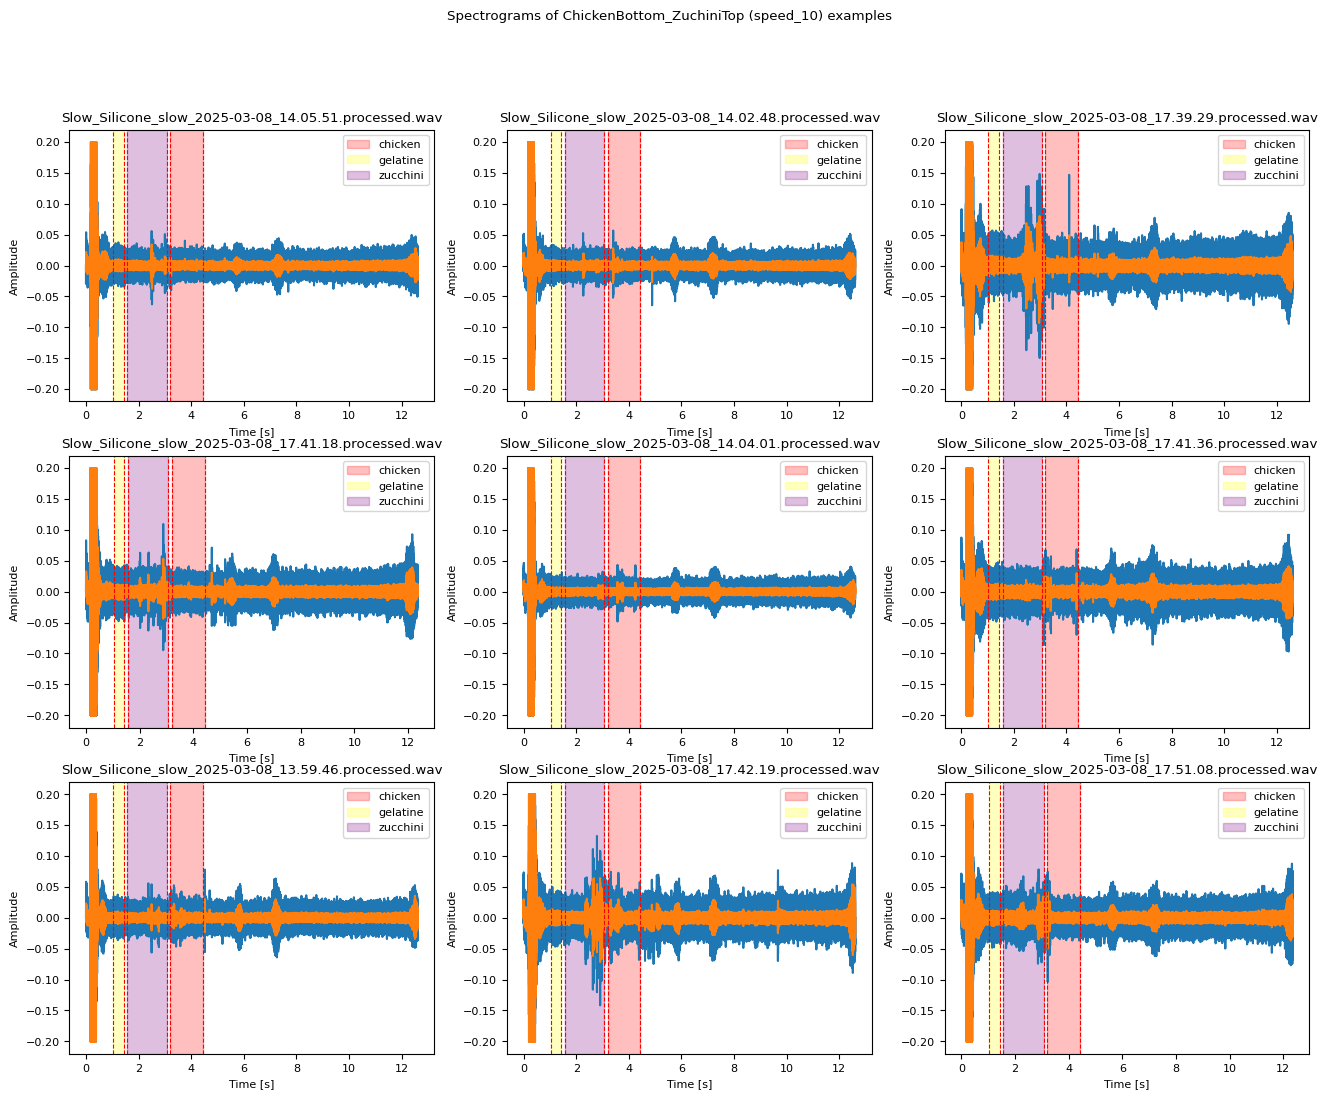

In [9]:
plot_examples(os.path.join(data_path, "ChickenBottom_ZuchiniTop", "speed_10"), "ChickenBottom_ZuchiniTop", "speed_10")

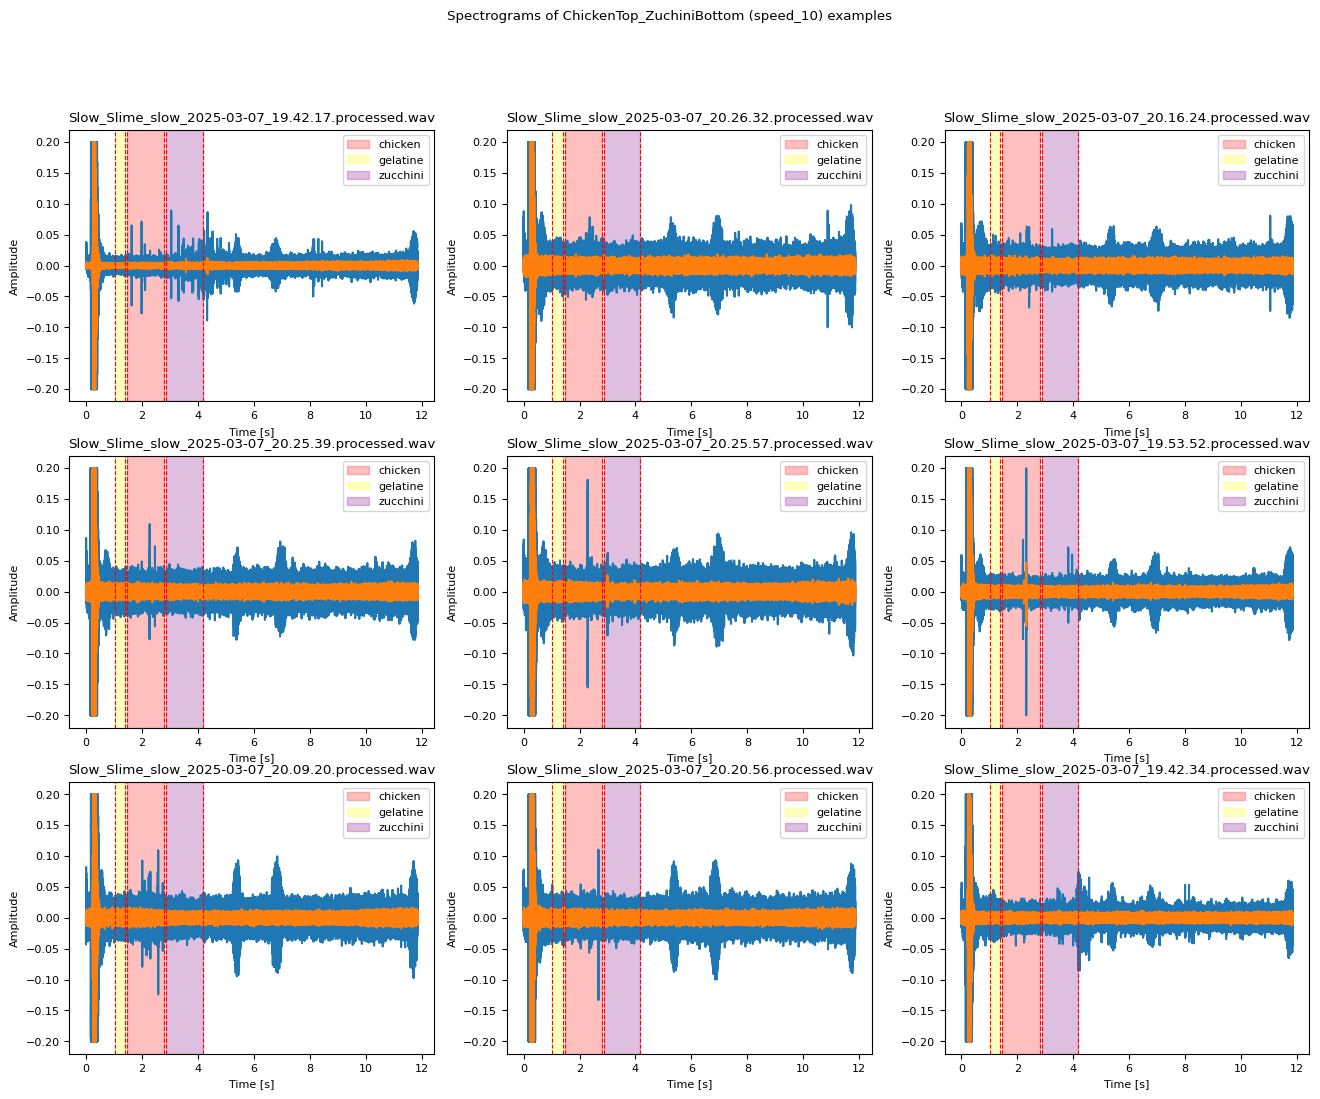

In [7]:
plot_examples(os.path.join(data_path, "ChickenTop_ZuchiniBottom", "speed_10"), "ChickenTop_ZuchiniBottom", "speed_10")